In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
import re
import os
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import itertools
from sklearn.metrics import *
import gc

In [4]:
os.chdir(r"C:\Users\Mohiuddin\Desktop\machine learning\ML\av-ltfs data hack")

In [121]:
train_data = pd.read_csv('train.csv')

In [122]:
test_data = pd.read_csv('test_bqCt9Pv.csv')

In [123]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [6]:
print(train_data.shape)
print(test_data.shape)

(233154, 41)
(112392, 40)


In [124]:
train_data[['YEAR.ACCT.AGE', 'MONTH.ACCT.AGE']] = train_data["AVERAGE.ACCT.AGE"].str.split(' ', expand = True)
train_data[['CREDIT.HISTORY.YEAR', 'CREDIT.HISTORY.MONTH']] = train_data["CREDIT.HISTORY.LENGTH"].str.split(' ', expand = True)

In [125]:
test_data[['YEAR.ACCT.AGE', 'MONTH.ACCT.AGE']] = test_data["AVERAGE.ACCT.AGE"].str.split(' ', expand = True)
test_data[['CREDIT.HISTORY.YEAR', 'CREDIT.HISTORY.MONTH']] = test_data["CREDIT.HISTORY.LENGTH"].str.split(' ', expand = True)

In [126]:
train_data['YEAR.ACCT.AGE'] = train_data['YEAR.ACCT.AGE'].str.extract(r'(\d+)', expand=True).astype(int)
train_data['MONTH.ACCT.AGE'] = train_data['MONTH.ACCT.AGE'].str.extract(r'(\d+)', expand=True).astype(int)
train_data['CREDIT.HISTORY.YEAR'] = train_data['CREDIT.HISTORY.YEAR'].str.extract(r'(\d+)', expand=True).astype(int)
train_data['CREDIT.HISTORY.MONTH'] = train_data['CREDIT.HISTORY.MONTH'].str.extract(r'(\d+)', expand=True).astype(int)
test_data['YEAR.ACCT.AGE'] = test_data['YEAR.ACCT.AGE'].str.extract(r'(\d+)', expand=True).astype(int)
test_data['MONTH.ACCT.AGE'] = test_data['MONTH.ACCT.AGE'].str.extract(r'(\d+)', expand=True).astype(int)
test_data['CREDIT.HISTORY.YEAR'] = test_data['CREDIT.HISTORY.YEAR'].str.extract(r'(\d+)', expand=True).astype(int)
test_data['CREDIT.HISTORY.MONTH'] = test_data['CREDIT.HISTORY.MONTH'].str.extract(r'(\d+)', expand=True).astype(int)

In [127]:
 test_data.isnull().sum(axis = 0)[8:10]

Date.of.Birth         0
Employment.Type    3443
dtype: int64

In [128]:
train_data["Employment.Type"].value_counts(dropna = False)

Self employed    127635
Salaried          97858
NaN                7661
Name: Employment.Type, dtype: int64

In [129]:
train_data.replace(np.nan, 'UnEmployed', regex=True,inplace = True)

In [130]:
test_data.replace(np.nan, 'UnEmployed', regex=True,inplace = True)

In [131]:
train_data['Date_of_Birth'] = pd.to_datetime(train_data['Date.of.Birth'])
test_data['Date_of_Birth'] = pd.to_datetime(test_data['Date.of.Birth'])

In [132]:
train_data['Disbursal_Date'] = pd.to_datetime(train_data['DisbursalDate'])
test_data['Disbursal_Date'] = pd.to_datetime(test_data['DisbursalDate'])

In [133]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,YEAR.ACCT.AGE,MONTH.ACCT.AGE,CREDIT.HISTORY.YEAR,CREDIT.HISTORY.MONTH,Date_of_Birth,Disbursal_Date
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0yrs 0mon,0yrs 0mon,0,0,0,0,0,0,1984-01-01,2018-03-08
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,1yrs 11mon,1yrs 11mon,0,1,1,11,1,11,1985-07-31,2018-09-26
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0yrs 0mon,0yrs 0mon,0,0,0,0,0,0,1985-08-24,2018-01-08
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0yrs 8mon,1yrs 3mon,1,1,0,8,1,3,1993-12-30,2018-10-26
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0yrs 0mon,0yrs 0mon,1,1,0,0,0,0,1977-09-12,2018-09-26


In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le_color = LabelEncoder()
le_make = LabelEncoder()
le_color1 = LabelEncoder()
le_make1 = LabelEncoder()

train_data['PERFORM_CSN_DESC'] = le_color.fit_transform(train_data["PERFORM_CNS.SCORE.DESCRIPTION"])
train_data['Employment_Type'] = le_make.fit_transform(train_data["Employment.Type"])
test_data['PERFORM_CSN_DESC'] = le_color1.fit_transform(test_data["PERFORM_CNS.SCORE.DESCRIPTION"])
test_data['Employment_Type'] = le_make1.fit_transform(test_data["Employment.Type"])

In [135]:
#one_hot_tr = pd.get_dummies(train_data['Employment.Type'])
#one_hot_te = pd.get_dummies(test_data['Employment.Type'])

In [136]:
train_data.groupby('Employment.Type').loan_default.sum(Normalize= True)

Employment.Type
Salaried         19910
Self employed    29057
UnEmployed        1644
Name: loan_default, dtype: int64

In [137]:
train_data["DOB_Year"] = train_data.Date_of_Birth.dt.year
test_data["DOB_Year"] = test_data.Date_of_Birth.dt.year
train_data["Disbursal_Year"] = train_data.Disbursal_Date.dt.year
test_data["Disbursal_Year"] = test_data.Disbursal_Date.dt.year

In [138]:
train_data["age"] = train_data["Disbursal_Year"]-train_data["DOB_Year"]
test_data["age"] = test_data["Disbursal_Year"]-test_data["DOB_Year"]

In [139]:
test_data["Cost"] = test_data["asset_cost"]-test_data["disbursed_amount"]
train_data["Cost"] = train_data["asset_cost"]-train_data["disbursed_amount"]

In [140]:
test_data["Total_Santioned"] = test_data["PRI.SANCTIONED.AMOUNT"]+test_data["SEC.CURRENT.BALANCE"]
train_data["Total_Santioned"] = train_data["PRI.SANCTIONED.AMOUNT"]+train_data["SEC.CURRENT.BALANCE"]

In [141]:
test_data["Total_Disburbed"] = test_data["PRI.DISBURSED.AMOUNT"]+test_data["SEC.DISBURSED.AMOUNT"]
train_data["Total_Disburbed"] = train_data["PRI.DISBURSED.AMOUNT"]+train_data["SEC.DISBURSED.AMOUNT"]

In [142]:
train_data["Total_instalAmt"] = train_data["PRIMARY.INSTAL.AMT"]+train_data["SEC.INSTAL.AMT"]
test_data["Total_instalAmt"] = test_data["PRIMARY.INSTAL.AMT"]+test_data["SEC.INSTAL.AMT"]

In [143]:
test_data.drop(['UniqueID','Employment.Type','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',"Date.of.Birth","branch_id","supplier_id",
                "manufacturer_id","Current_pincode_ID","DisbursalDate", "PERFORM_CNS.SCORE.DESCRIPTION","State_ID",
                "Employee_code_ID","Date_of_Birth", "Disbursal_Date"], axis=1,inplace = True)
target = train_data["loan_default"]
train_data.drop(['UniqueID','Employment.Type','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','loan_default',"Date.of.Birth",
                 "branch_id","supplier_id","manufacturer_id","Current_pincode_ID",
                 "DisbursalDate", "PERFORM_CNS.SCORE.DESCRIPTION","State_ID","Employee_code_ID",
                 "Date_of_Birth", "Disbursal_Date"], axis=1,inplace = True)

print(test_data.shape)
print(train_data.shape)


(112392, 40)
(233154, 40)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.transform(test_data)

In [144]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [145]:
#Initializing Neural Network
classifier = Sequential()

In [146]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 40))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=40, units=6, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [147]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [148]:
# Fitting our model 
classifier.fit(train_data, target, batch_size = 10, nb_epoch = 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
233154/233154 [==============================] - 26s 110us/step - loss: 0.5289 - acc: 0.7827
Epoch 2/100
233154/233154 [==============================] - 25s 105us/step - loss: 0.5232 - acc: 0.7829
Epoch 3/100
233154/233154 [==============================] - 26s 112us/step - loss: 0.5232 - acc: 0.7829
Epoch 4/100
233154/233154 [==============================] - 29s 125us/step - loss: 0.5232 - acc: 0.7829
Epoch 5/100
233154/233154 [==============================] - 26s 111us/step - loss: 0.5232 - acc: 0.7829
Epoch 6/100
233154/233154 [==============================] - 26s 112us/step - loss: 0.5232 - acc: 0.7829
Epoch 7/100
233154/233154 [==============================] - 26s 111us/step - loss: 0.5232 - acc: 0.7829
Epoch 8/100
233154/233154 [==============================] - 26s 112us/step - loss: 0.5232 - acc: 0.7829
Epoch 9/100
233154/233154 [==============================] - 27s 116us/step - loss: 0.5232 - acc: 0.7829
Epoch 10/100
233154/233154 [===========================

233154/233154 [==============================] - 25s 109us/step - loss: 0.5232 - acc: 0.7829
Epoch 79/100
233154/233154 [==============================] - 25s 108us/step - loss: 0.5232 - acc: 0.7829
Epoch 80/100
233154/233154 [==============================] - 26s 110us/step - loss: 0.5232 - acc: 0.7829
Epoch 81/100
233154/233154 [==============================] - 25s 108us/step - loss: 0.5232 - acc: 0.7829
Epoch 82/100
233154/233154 [==============================] - 26s 110us/step - loss: 0.5232 - acc: 0.7829
Epoch 83/100
233154/233154 [==============================] - 25s 108us/step - loss: 0.5232 - acc: 0.7829
Epoch 84/100
233154/233154 [==============================] - 25s 108us/step - loss: 0.5232 - acc: 0.7829
Epoch 85/100
233154/233154 [==============================] - 24s 103us/step - loss: 0.5232 - acc: 0.7829
Epoch 86/100
233154/233154 [==============================] - 24s 101us/step - loss: 0.5232 - acc: 0.7829
Epoch 87/100
233154/233154 [==============================]

In [149]:
# Predicting the Test set results
y_p = classifier.predict(test_data)

y_pred = (y_p > 0.5)

In [151]:
y_p

array([[0.21992001],
       [0.21992001],
       [0.21992001],
       ...,
       [0.21992001],
       [0.21992001],
       [0.21992001]], dtype=float32)

In [111]:
x = pd.DataFrame(y_pred)
x.replace(False, "0", regex=True,inplace = True)
x.replace(True, "1", regex=True,inplace = True)



In [112]:
submission["loan_default"] = x

In [115]:
submission["loan_default"].unique()

array(['0', '1'], dtype=object)

In [116]:
#predictions = model.predict_proba(test)
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':x})
submission.to_csv('88stSolution.csv',index=False)

In [27]:
train_data.shape

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,CREDIT.HISTORY.MONTH,PERFORM_CSN_DESC,Employment_Type,DOB_Year,Disbursal_Year,age,Cost,Total_Santioned,Total_Disburbed,Total_instalAmt
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,13,0,1984,2018,34,7822,0,0,0
1,47145,65550,73.23,1,1,0,0,0,0,598,...,11,8,1,1985,2018,33,18405,50200,50200,1991
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,13,1,1985,2018,33,8082,0,0,0
3,57513,66113,88.48,1,1,0,0,0,0,305,...,3,11,1,1993,2018,25,8600,0,0,31
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,13,1,1977,2018,41,7922,0,0,0


In [23]:
import lightgbm as lgb
from sklearn.metrics import matthews_corrcoef, precision_recall_fscore_support

In [ ]:
train_data.drop(["Date_of_Birth", "Disbursal_Date"], axis=1,inplace = True)
test_data.drop(["Date_of_Birth", "Disbursal_Date"], axis=1,inplace = True)


In [31]:
x_train = train_data
target = target
input_target = target
#x_train.drop('target', axis=1, inplace=True)
#x_train.drop('signal_id', axis=1, inplace=True)
features = train_data.columns
param = {'num_leaves': 80,
         'min_data_in_leaf': 60, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.1,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "random_state": 133,
         "verbosity": -1}
max_iter=5

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [31]:
from sklearn.model_selection import KFold
from sklearn import metrics
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(x_train))
feature_importance_df = pd.DataFrame()
score = [0 for _ in range(folds.n_splits)]
for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train.values, target.values)):
    print("Fold No.{}".format(fold_+1))
    trn_data = lgb.Dataset(x_train.iloc[trn_idx][features],
                           label=target.iloc[trn_idx])
    val_data = lgb.Dataset(x_train.iloc[val_idx][features],
                           label=target.iloc[val_idx])
    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 100)
    
    oof[val_idx] = clf.predict(x_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    score[fold_] = metrics.roc_auc_score(target.iloc[val_idx], oof[val_idx])
    if fold_ == max_iter - 1: break
if (folds.n_splits == max_iter):
    print("CV score: {:<8.5f}".format(metrics.roc_auc_score(target, oof)))
else:
     print("CV score: {:<8.5f}".format(sum(score) / max_iter))

Fold No.1
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.735087	valid_1's auc: 0.657943
[200]	training's auc: 0.782123	valid_1's auc: 0.656508
Early stopping, best iteration is:
[131]	training's auc: 0.751341	valid_1's auc: 0.658583
Fold No.2
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.735731	valid_1's auc: 0.658446
Early stopping, best iteration is:
[78]	training's auc: 0.722998	valid_1's auc: 0.658762
Fold No.3
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.734263	valid_1's auc: 0.662024
[200]	training's auc: 0.780652	valid_1's auc: 0.660857
Early stopping, best iteration is:
[146]	training's auc: 0.757473	valid_1's auc: 0.662301
Fold No.4
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.734404	valid_1's auc: 0.667928
[200]	training's auc: 0.780223	valid_1's auc: 0.66721
Early stopping, best iteration is:
[103]	training's auc

In [39]:
predictions = clf.predict(test_data)
predict = pd.Series(predictions).round()
predict= predict.astype(np.int64)

In [33]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [44]:
#predictions = model.predict_proba(test)
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':predict})
final_result.to_csv('7stSolution.csv',index=False)

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 200, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(train_data, target)

# Extract feature importances
#feature_importance_values = random_forest.feature_importances_
#feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
prediction = random_forest.predict(test_data)



[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.1s finished


In [33]:
#predictions = model.predict_proba(test)
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':prediction})
final_result.to_csv('12stSolution.csv',index=False)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(train_data,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
predictions = model.predict(test_data)

In [61]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [62]:
#predictions = model.predict_proba(test)
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':predictions})
final_result.to_csv('4stSolution.csv',index=False)

In [76]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(train_data, target)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
predictions = logreg.predict(test_data)

In [113]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [ ]:
`#predictions = model.predict_proba(test)
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default'folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)


In [37]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)
predicted = np.zeros((test_data.shape[0]))
measured= np.zeros((train_data.shape[0]))
score = 0



In [39]:
for times, (trn_idx, val_idx) in enumerate(folds.split(train_data.values,target.values)):
    model = RandomForestClassifier(n_estimators=500, n_jobs = -1)
    #model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, n_jobs=-1)
    model.fit(train_data.iloc[trn_idx],target[trn_idx])
    measured[val_idx] = model.predict(train_data.iloc[val_idx])
    predicted += model.predict(test_data)/folds.n_splits
    score += model.score(train_data.iloc[val_idx],target[val_idx])
    print("Fold: {} score: {}".format(times,model.score(train_data.iloc[val_idx],target[val_idx])))

    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = train_data.columns
    
    if model.score(train_data.iloc[val_idx],target[val_idx]) > 0.92000:
        hm = 30
        plt.figure(figsize=(7, 10))
        plt.title('Feature Importances')
        plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
        plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

    gc.collect()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [132]:
#predictions = clf.predict(test_data)
predict1 = pd.Series(predicted).round()
predict1= predict1.astype(np.int64)

In [133]:
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':predict1})
final_result.to_csv('11stSolution.csv',index=False)

In [115]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

In [126]:
feature_importances = pd.DataFrame(importances, index = train_data.columns, columns = ['importance'])
feature_importances.sort_values('importance', ascending = False)
feature_importances.head(20)

,importance
disbursed_amount,0.128247
asset_cost,0.132097
ltv,0.134480
MobileNo_Avl_Flag,0.000000
Aadhar_flag,0.004737
PAN_flag,0.007086
VoterID_flag,0.004722
Driving_flag,0.002663
Passport_flag,0.000430
PERFORM_CNS.SCORE,0.024765


In [ ]:
data = train_data.drop(columns = ['MobileNo_Avl_Flag', 'Passport_flag', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
       'Disbursal_Year'], axis = 1)
test = test_data.drop(columns = ['MobileNo_Avl_Flag', 'Passport_flag', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
       'Disbursal_Year'], axis = 1)

In [127]:
train_data = data
test_data = test

In [49]:
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from numba import jit
import itertools

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()


In [52]:
features = list(train_data.columns.values)
X = train_data[features].values
y = pd.DataFrame(target).values
te = pd.read_csv('test_bqCt9Pv.csv')

test = test_data[features].values
submission = pd.DataFrame()
submission['Unique'] = te.UniqueID.values
submission['loan_default'] = ""

In [53]:
def runXGB(train_X, train_y, validation_X, validation_y, test_X):
    param = {}
    param['num_class'] = 9
    param['objective'] = 'multi:softmax'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['gamma'] = 0
    param['eval_metric'] = "merror"
    param['min_child_weight'] = 3
    param['max_delta_step'] = 1
    param['subsample'] = 0.9
    param['colsample_bytree'] = 0.4
    param['colsample_bylevel'] = 0.6
    param['colsample_bynode'] = 0.5
    param['lambda'] = 0
    param['alpha'] = 0
    param['seed'] = 0
    num_rounds = 500

    plst = list(param.items())

    xgtrain = xgb.DMatrix(train_X, label = train_y)
    xgcv = xgb.DMatrix(validation_X, label = validation_y)
    xgtest = xgb.DMatrix(test_X)

    evallist = [(xgcv,'eval')]
    model = xgb.train(plst, xgtrain, num_rounds, evallist, early_stopping_rounds = 100)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [63]:
kfold = 7
skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    submission = pd.DataFrame()
    submission['UniqueID'] = te["UniqueID"].values
    submission['surface' + str(i+1)] = ""
    
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    preds, model = runXGB(X_train, y_train, X_valid, y_valid, test)
    
    submission['loan_default' + str(i+1)] = preds
    
    submission.to_csv('submission_' + str(i+1) + '.csv', index=False)

[Fold 1/7]
[0]	eval-merror:0.217088
Will train until eval-merror hasn't improved in 100 rounds.
[1]	eval-merror:0.217088
[2]	eval-merror:0.217088
[3]	eval-merror:0.217088
[4]	eval-merror:0.217088
[5]	eval-merror:0.217088
[6]	eval-merror:0.217088
[7]	eval-merror:0.217088
[8]	eval-merror:0.217088
[9]	eval-merror:0.217088
[10]	eval-merror:0.217088
[11]	eval-merror:0.217088
[12]	eval-merror:0.217088
[13]	eval-merror:0.217088
[14]	eval-merror:0.217088
[15]	eval-merror:0.217088
[16]	eval-merror:0.217088
[17]	eval-merror:0.217088
[18]	eval-merror:0.217088
[19]	eval-merror:0.217088
[20]	eval-merror:0.217088
[21]	eval-merror:0.217088
[22]	eval-merror:0.217088
[23]	eval-merror:0.217088
[24]	eval-merror:0.217088
[25]	eval-merror:0.217088
[26]	eval-merror:0.217088
[27]	eval-merror:0.217088
[28]	eval-merror:0.217088
[29]	eval-merror:0.217088
[30]	eval-merror:0.217088
[31]	eval-merror:0.217088
[32]	eval-merror:0.217088
[33]	eval-merror:0.217088
[34]	eval-merror:0.217119
[35]	eval-merror:0.217088
[36

[78]	eval-merror:0.216465
[79]	eval-merror:0.216465
[80]	eval-merror:0.216465
[81]	eval-merror:0.216404
[82]	eval-merror:0.216525
[83]	eval-merror:0.216555
[84]	eval-merror:0.216555
[85]	eval-merror:0.216525
[86]	eval-merror:0.216525
[87]	eval-merror:0.216555
[88]	eval-merror:0.216585
[89]	eval-merror:0.216585
[90]	eval-merror:0.216645
[91]	eval-merror:0.216675
[92]	eval-merror:0.216675
[93]	eval-merror:0.216705
[94]	eval-merror:0.216675
[95]	eval-merror:0.216765
[96]	eval-merror:0.216615
[97]	eval-merror:0.216735
[98]	eval-merror:0.216765
[99]	eval-merror:0.216585
[100]	eval-merror:0.216555
[101]	eval-merror:0.216495
[102]	eval-merror:0.216585
[103]	eval-merror:0.216645
[104]	eval-merror:0.216585
[105]	eval-merror:0.216705
[106]	eval-merror:0.216675
[107]	eval-merror:0.216765
[108]	eval-merror:0.216765
[109]	eval-merror:0.216765
[110]	eval-merror:0.216795
[111]	eval-merror:0.216765
[112]	eval-merror:0.216705
[113]	eval-merror:0.216705
[114]	eval-merror:0.216675
[115]	eval-merror:0.216

[217]	eval-merror:0.216194
[218]	eval-merror:0.216224
[219]	eval-merror:0.216134
[220]	eval-merror:0.216164
[221]	eval-merror:0.216134
[222]	eval-merror:0.216164
[223]	eval-merror:0.216134
[224]	eval-merror:0.216134
[225]	eval-merror:0.216134
[226]	eval-merror:0.216134
[227]	eval-merror:0.216134
[228]	eval-merror:0.216164
[229]	eval-merror:0.216134
[230]	eval-merror:0.216194
[231]	eval-merror:0.216164
[232]	eval-merror:0.216164
[233]	eval-merror:0.216224
[234]	eval-merror:0.216254
[235]	eval-merror:0.216284
[236]	eval-merror:0.216314
[237]	eval-merror:0.216374
[238]	eval-merror:0.216404
[239]	eval-merror:0.216404
[240]	eval-merror:0.216404
[241]	eval-merror:0.216374
[242]	eval-merror:0.216344
[243]	eval-merror:0.216374
[244]	eval-merror:0.216374
[245]	eval-merror:0.216344
[246]	eval-merror:0.216314
[247]	eval-merror:0.216344
[248]	eval-merror:0.216314
[249]	eval-merror:0.216344
[250]	eval-merror:0.216344
[251]	eval-merror:0.216344
[252]	eval-merror:0.216344
[253]	eval-merror:0.216374
[

[8]	eval-merror:0.217071
[9]	eval-merror:0.217071
[10]	eval-merror:0.217071
[11]	eval-merror:0.217071
[12]	eval-merror:0.217071
[13]	eval-merror:0.217071
[14]	eval-merror:0.217071
[15]	eval-merror:0.217071
[16]	eval-merror:0.217071
[17]	eval-merror:0.217071
[18]	eval-merror:0.217071
[19]	eval-merror:0.217071
[20]	eval-merror:0.217071
[21]	eval-merror:0.217071
[22]	eval-merror:0.217071
[23]	eval-merror:0.217071
[24]	eval-merror:0.217071
[25]	eval-merror:0.217071
[26]	eval-merror:0.217071
[27]	eval-merror:0.217071
[28]	eval-merror:0.217071
[29]	eval-merror:0.217071
[30]	eval-merror:0.217071
[31]	eval-merror:0.217071
[32]	eval-merror:0.217071
[33]	eval-merror:0.217071
[34]	eval-merror:0.217071
[35]	eval-merror:0.217041
[36]	eval-merror:0.217011
[37]	eval-merror:0.217011
[38]	eval-merror:0.217011
[39]	eval-merror:0.217011
[40]	eval-merror:0.217011
[41]	eval-merror:0.217011
[42]	eval-merror:0.216981
[43]	eval-merror:0.216951
[44]	eval-merror:0.216981
[45]	eval-merror:0.216981
[46]	eval-merr

[128]	eval-merror:0.216471
[129]	eval-merror:0.216471
[130]	eval-merror:0.216441
[131]	eval-merror:0.216441
[132]	eval-merror:0.216471
[133]	eval-merror:0.216411
[134]	eval-merror:0.216411
[135]	eval-merror:0.216411
[136]	eval-merror:0.216441
[137]	eval-merror:0.216471
[138]	eval-merror:0.216501
[139]	eval-merror:0.216591
[140]	eval-merror:0.216501
[141]	eval-merror:0.216531
[142]	eval-merror:0.216561
[143]	eval-merror:0.216561
[144]	eval-merror:0.216501
[145]	eval-merror:0.216531
[146]	eval-merror:0.216531
[147]	eval-merror:0.216531
[148]	eval-merror:0.216501
[149]	eval-merror:0.216531
[150]	eval-merror:0.216561
[151]	eval-merror:0.216531
[152]	eval-merror:0.216561
[153]	eval-merror:0.216531
[154]	eval-merror:0.216531
[155]	eval-merror:0.216531
[156]	eval-merror:0.216561
[157]	eval-merror:0.216531
[158]	eval-merror:0.216501
[159]	eval-merror:0.216531
[160]	eval-merror:0.216531
[161]	eval-merror:0.216531
[162]	eval-merror:0.216621
[163]	eval-merror:0.216591
[164]	eval-merror:0.216621
[

In [64]:
submission1 = pd.read_csv('submission_1.csv')
submission2 = pd.read_csv('submission_2.csv')
submission3 = pd.read_csv('submission_3.csv')
submission4 = pd.read_csv('submission_4.csv')
submission5 = pd.read_csv('submission_5.csv')
submission6 = pd.read_csv('submission_6.csv')
submission7 = pd.read_csv('submission_7.csv')

In [65]:
from functools import reduce
submissions = [submission1,submission2,submission3,submission4,submission5,submission6,submission7]
submission_final = reduce(lambda left,right: pd.merge(left,right,on='UniqueID'), submissions)


In [66]:
submission_final = pd.DataFrame(submission_final.mode(axis='columns'))
submission_final = pd.DataFrame(submission_final[submission_final.columns[0]])
submission_final.columns = ['loan_default']
submission_final['loan_default'] = submission_final['loan_default'].astype('int')
submission_final['loan_default'] = submission_final['loan_default']
submission_final['loan_default'] = te.index.values
submission_final.to_csv('submission_final.csv', index=False)

In [62]:
te.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    #criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features="auto",
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
rf.fit(train_data, target)
y_pred = rf.predict(test_data)

In [62]:
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':y_pred})
final_result.to_csv('6stSolution.csv',index=False)

In [117]:
less_important_features = feature_importances.loc[feature_importances['importance'] < 0.0025]
print('There are {0} features their importance value is less then 0.0025'.format(less_important_features.shape[0]))

There are 10 features their importance value is less then 0.0025


In [125]:
data = train_data.drop(columns = ['MobileNo_Avl_Flag', 'Passport_flag', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
       'Disbursal_Year'], axis = 1)
test = test_data.drop(columns = ['MobileNo_Avl_Flag', 'Passport_flag', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
       'Disbursal_Year'], axis = 1)

In [32]:
print('Average score', score / folds.n_splits)

Average score 0.7751700438245912


In [33]:
confusion_matrix(measured,target)

array([[177863,  47740],
       [  4680,   2871]], dtype=int64)

Text(0.5,24,'Predicted label')

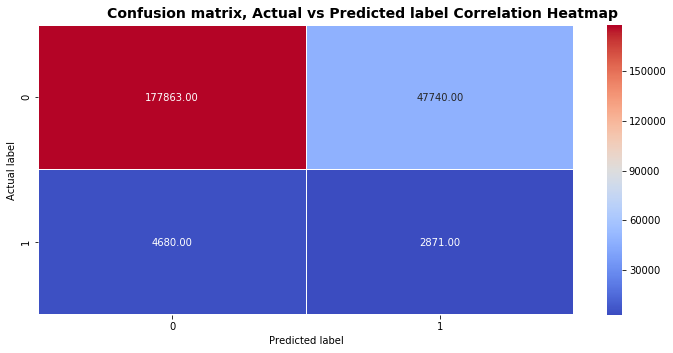

In [34]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.heatmap(pd.DataFrame(confusion_matrix(measured,target)),
            ax = ax,
            cmap = 'coolwarm',
            annot = True,
            fmt = '.2f',
            linewidths = 0.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Confusion matrix, Actual vs Predicted label Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

In [38]:
feature_importances = pd.DataFrame(importances, index = train_data.columns, columns = ['importance'])
feature_importances.sort_values('importance', ascending = False)
feature_importances.head(20)

,importance
disbursed_amount,0.121752
asset_cost,0.117811
ltv,0.128222
branch_id,0.042462
supplier_id,0.080403
manufacturer_id,0.024365
Current_pincode_ID,0.112563
State_ID,0.025609
Employee_code_ID,0.092280
MobileNo_Avl_Flag,0.000000


In [39]:
less_important_features = feature_importances.loc[feature_importances['importance'] < 0.0025]
print('There are {0} features their importance value is less then 0.0025'.format(less_important_features.shape[0]))

There are 9 features their importance value is less then 0.0025


In [ ]:
#Remove less important features from train and test set.
for i, col in enumerate(less_important_features.index):
    data = train_data.drop(columns = [col], axis = 1)
    test = test_data.drop(columns = [col], axis = 1)
    
data.shape, test.shape

In [ ]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['surface'] = le.inverse_transform(predicted.argmax(axis=1))
submission.to_csv('rs_surface_submission6.csv', index=False)
submission.head(10)

TypeError: only size-1 arrays can be converted to Python scalars

In [41]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [42]:
final_result = pd.DataFrame({'UniqueID':submission['UniqueID'],'loan_default':predicted})
final_result.to_csv('6stSolution.csv',index=False)

In [ ]:
svc = svm.SVC(
    C=5,
    kernel="rbf",
    degree=3,
    gamma="auto",
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape="ovr",
    random_state=None,
)
model = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)